In [1]:
import os
import time
import dill
from typing import List
from functools import reduce
from calendar import monthrange

In [2]:
import json
import csv
import requests
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup
import urllib.request as urllib2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from random import sample, randint, shuffle
from sklearn.decomposition import PCA

In [4]:
import nltk
import text_summarizer
from gensim.utils import simple_preprocess
from gensim.summarization.summarizer import summarize
from gensim.models import Word2Vec, LsiModel
from gensim.test.utils import common_dictionary, common_corpus

In [5]:
from time import process_time

In [6]:
t = process_time()
dill.load_session('thesis_env2.db')
process_time() - t

-3532.874604

In [7]:
with open('objects.csv') as csv_file:
    objects = csv_file.read().split("\n")
objects[0] = 'angle'

In [9]:
len(all_)

1685787

In [10]:
len(politics), len(computers), len(travel), len(movies), len(books), len(fball)

(5400, 5400, 5400, 5400, 5400, 5400)

In [29]:
# variables:

In [12]:
# mpol, mcomp, mtrav, mmov, mbooks, mfball

In [13]:
# summaries_pol, summaries_comp, summaries_trav, 
# summaries_mov, summaries_bks, summaries_fball

In [14]:
# bow_pol, bow_comp, bow_trav, bow_mov, bow_bks, bow_fball
# cwe_pol, cwe_comp, cwe_trav, cwe_mov, cwe_bks, cwe_fball
# ctrls_pol, ctrls_comp, ctrls_trav, ctrls_mov, ctrls_bks, ctrls_fball

In [15]:
# mpol_s, mcomp_s, mtrav_s, mbks_s, mmov_s, mfball_s

In [16]:
# mpol_sb, mcomp_sb, mtrav_sb, mbks_sb, mmov_sb, mfball_sb

In [17]:
# mpol_sc, mcomp_sc, mtrav_sc, mbks_sc, mmov_sc, mfball_sc

In [18]:
# mpol_c, mcomp_c, mtrav_c, mbks_c, mmov_c, mfball_c

In [19]:
with open('debiaswe-master/data/equalize_pairs.json') as f:
    pairs = json.loads(f.read())
pairs = list(map(lambda x: [x[0].lower(), x[1].lower()], pairs))

In [20]:
with open('debiaswe-master/data/professions.json') as f:
    profs = json.loads(f.read())
proflist = list(filter(lambda x: x in mpol.wv.vocab, [p[0] for p in profs if abs(p[1]) < 0.6]))

In [21]:
with open('debiaswe-master/data/gender_specific_seed.json') as f:
    gender_specific = json.loads(f.read())

In [22]:
with open('debiaswe-master/data/gender_specific_full.json') as f:
    gender_specific_full = json.loads(f.read())

In [23]:
wordlist = ['he', 'she', 'doctor', 'nurse', 'man', 'woman', 'male', 'female', 'politician', 'guy', \
            'scientist', 'teacher', 'professor', 'mother', 'pretty', 'handsome', 'strong', 'coward', \
            'timid', 'leadership', 'blond', 'lovely', 'petite', 'surgeon', 'physician', 'shopkeeper', \
            'cooking', 'sewing', 'chuckle', 'sassy', 'lanky', 'competent', 'brilliant', 'capable', 'smart', \
            'intelligent', 'incompetent', 'librarian', 'cosmetics', 'maid', 'clever', 'dressed', 'captain', \
            'nanny', 'philosopher', 'architect', 'financier', 'warrior', 'magician', 'housekeeper', 'homemaker']

In [39]:
cities = [x.lower() for x in cities]

In [24]:
len(adjectives), len(cities), len(objects), len(proflist), len(wordlist)

(393, 2010, 192, 190, 51)

In [33]:
vocab = set(mpol.wv.vocab)
for m in [mpol, mcomp, mtrav, mmov, mbooks, mfball]:
    vocab &= set(m.wv.vocab)
len(vocab)

12600

In [63]:
vocab_s = set(vocab)
for m in [mpol_s, mcomp_s, mtrav_s, mbks_s, mmov_s, mfball_s]:
    vocab_s &= set(m.wv.vocab)
len(vocab_s)

4753

In [65]:
vocab_sb = set(vocab)
for m in [mpol_sb, mcomp_sb, mtrav_sb, mbks_sb, mmov_sb, mfball_sb]:
    vocab_sb &= set(m.wv.vocab)
len(vocab_sb)

4788

In [67]:
vocab_sc = set(vocab)
for m in [mpol_sc, mcomp_sc, mtrav_sc, mbks_sc, mmov_sc, mfball_sc]:
    vocab_sc &= set(m.wv.vocab)
len(vocab_sc)

4897

In [69]:
vocab_c = set(vocab)
for m in [mpol_c, mcomp_c, mtrav_c, mbks_c, mmov_c, mfball_c]:
    vocab_c &= set(m.wv.vocab)
len(vocab_c)

4765

In [71]:
vocab_all = set(vocab)
for m in [mpol_s, mcomp_s, mtrav_s, mbks_s, mmov_s, mfball_s] + \
[mpol_sb, mcomp_sb, mtrav_sb, mbks_sb, mmov_sb, mfball_sb] + \
[mpol_sc, mcomp_sc, mtrav_sc, mbks_sc, mmov_sc, mfball_sc] + \
[mpol_c, mcomp_c, mtrav_c, mbks_c, mmov_c, mfball_c]:
    vocab_all &= set(m.wv.vocab)
len(vocab_all)

3905

In [74]:
len(vocab_c & set(proflist)), len(vocab_all & set(proflist))

(42, 33)

In [62]:
len(vocab & set(proflist))

116

In [137]:
mpol_s2 = mpol_s

In [141]:
def getw2v_s(sums):
    sentences = []
    for t in sums:
        sentences += nltk.sent_tokenize(t)
    docs = [simple_preprocess(s) for s in sentences]
    return Word2Vec(docs)
mpol_s = getw2v_s(summaries_pol)

# Bias

Text(0.5, 1.0, 'Explained Variance vs Component Number (Randomly Generated Data)')

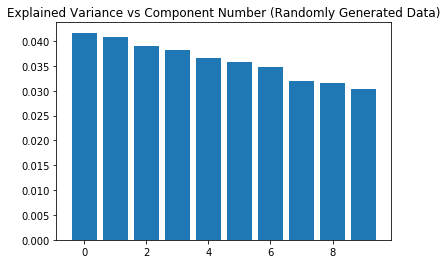

In [28]:
pca_r = PCA(n_components = 10)
pca_r.fit(np.random.rand(70,100))
plt.bar(range(10), pca_r.explained_variance_ratio_)
plt.title("Explained Variance vs Component Number (Randomly Generated Data)")

In [146]:
def getg(m):
    matrix = []
    for a, b in pairs:
        if a not in m.wv.vocab or b not in m.wv.vocab:
            continue
        center = (m.wv.get_vector(a) + m.wv.get_vector(b))/2
        matrix.append(m.wv.get_vector(a) - center)
        matrix.append(m.wv.get_vector(b) - center)
    matrix = np.array(matrix)
    p = PCA(n_components = 10)
    p.fit(matrix)
#     plt.bar(range(10), p.explained_variance_ratio_)
#     plt.title("Explained Variance vs Component Number (" + t + ")")
    return p.components_[0]

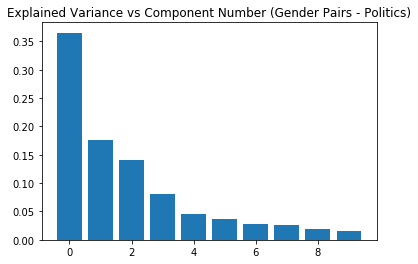

In [182]:
gpol = getg(mpol, "Gender Pairs - Politics")

In [142]:
gdict = {"politics": [], "computers": [], "travel": [], "books": [], "movies": [], "football": []}
labels = ["original", "summary (TextRank)", "summary (Centroid-BOW)", "summary (Centroid-WE)", "summary (control)"]

In [143]:
list(gdict)

['politics', 'computers', 'travel', 'books', 'movies', 'football']

In [144]:
def gdictadd(models):
    for i in range(6):
        gdict[list(gdict)[i]].append(getg(models[i]))

In [147]:
gdictadd([mpol, mcomp, mtrav, mmov, mbooks, mfball])
gdictadd([mpol_s, mcomp_s, mtrav_s, mbks_s, mmov_s, mfball_s])
gdictadd([mpol_sb, mcomp_sb, mtrav_sb, mbks_sb, mmov_sb, mfball_sb])
gdictadd([mpol_sc, mcomp_sc, mtrav_sc, mbks_sc, mmov_sc, mfball_sc])
gdictadd([mpol_c, mcomp_c, mtrav_c, mbks_c, mmov_c, mfball_c])

In [148]:
mdict = {"politics": [], "computers": [], "travel": [], "books": [], "movies": [], "football": []}

In [149]:
def mdictadd(models):
    for i in range(6):
        mdict[list(mdict)[i]].append(models[i])

In [150]:
mdictadd([mpol, mcomp, mtrav, mmov, mbooks, mfball])
mdictadd([mpol_s, mcomp_s, mtrav_s, mbks_s, mmov_s, mfball_s])
mdictadd([mpol_sb, mcomp_sb, mtrav_sb, mbks_sb, mmov_sb, mfball_sb])
mdictadd([mpol_sc, mcomp_sc, mtrav_sc, mbks_sc, mmov_sc, mfball_sc])
mdictadd([mpol_c, mcomp_c, mtrav_c, mbks_c, mmov_c, mfball_c])

In [85]:
def gproj(g, m, w1):
    wvec = m.wv.get_vector(w1)
    p = np.dot(g, wvec)/(np.linalg.norm(g)*np.linalg.norm(wvec))
    return p

In [101]:
def bias(g, m, vocab, wordlist):
    b = 0
    l = list(filter(lambda x: x in vocab, wordlist))
    for x in l:
        b += abs(gproj(g, m, x))
    return b/len(l)

In [151]:
print(labels[0])
for i in gdict:
    print("%10s" % i, \
          "%.3f" % bias(gdict[i][0], mdict[i][0], vocab, proflist), \
          "%.3f" % bias(gdict[i][0], mdict[i][0], vocab, adjectives), \
          "%.3f" % bias(gdict[i][0], mdict[i][0], vocab, cities), \
          "%.3f" % bias(gdict[i][0], mdict[i][0], vocab, objects), \
          "%.3f" % bias(gdict[i][0], mdict[i][0], vocab, gender_specific))

original
  politics 0.088 0.070 0.062 0.068 0.123
 computers 0.079 0.066 0.065 0.080 0.122
    travel 0.060 0.048 0.054 0.045 0.099
     books 0.083 0.087 0.079 0.079 0.176
    movies 0.079 0.065 0.079 0.061 0.157
  football 0.306 0.171 0.253 0.239 0.340


In [152]:
print(labels[1])
for i in gdict:
    print("%10s" % i, \
          "%.3f" % bias(gdict[i][1], mdict[i][1], vocab2, proflist), \
          "%.3f" % bias(gdict[i][1], mdict[i][1], vocab2, adjectives), \
          "%.3f" % bias(gdict[i][1], mdict[i][1], vocab2, cities), \
          "%.3f" % bias(gdict[i][1], mdict[i][1], vocab2, objects), \
          "%.3f" % bias(gdict[i][1], mdict[i][1], vocab2, gender_specific))

summary (TextRank)
  politics 0.566 0.213 0.502 0.302 0.435
 computers 0.148 0.102 0.126 0.098 0.139
    travel 0.145 0.090 0.115 0.079 0.117
     books 0.039 0.052 0.040 0.052 0.175
    movies 0.082 0.077 0.066 0.074 0.201
  football 0.209 0.092 0.131 0.128 0.172


In [127]:
print(labels[2])
for i in gdict:
    print("%10s" % i, \
          "%.3f" % bias(gdict[i][2], mdict[i][2], vocab2, proflist), \
          "%.3f" % bias(gdict[i][2], mdict[i][2], vocab2, adjectives), \
          "%.3f" % bias(gdict[i][2], mdict[i][2], vocab2, cities), \
          "%.3f" % bias(gdict[i][2], mdict[i][2], vocab2, objects), \
          "%.3f" % bias(gdict[i][2], mdict[i][2], vocab2, gender_specific))

summary (Centroid-BOW)
  politics 0.562 0.186 0.505 0.308 0.412
 computers 0.661 0.231 0.590 0.329 0.437
    travel 0.358 0.159 0.313 0.141 0.169
     books 0.047 0.050 0.041 0.044 0.161
    movies 0.066 0.059 0.065 0.082 0.174
  football 0.230 0.105 0.150 0.139 0.195


In [129]:
print(labels[3])
for i in gdict:
    print("%10s" % i, \
          "%.3f" % bias(gdict[i][3], mdict[i][3], vocab2, proflist), \
          "%.3f" % bias(gdict[i][3], mdict[i][3], vocab2, adjectives), \
          "%.3f" % bias(gdict[i][3], mdict[i][3], vocab2, cities), \
          "%.3f" % bias(gdict[i][3], mdict[i][3], vocab2, objects), \
          "%.3f" % bias(gdict[i][3], mdict[i][3], vocab2, gender_specific))

summary (Centroid-WE)
  politics 0.503 0.172 0.438 0.244 0.306
 computers 0.588 0.171 0.503 0.243 0.287
    travel 0.080 0.071 0.074 0.066 0.103
     books 0.058 0.051 0.046 0.050 0.162
    movies 0.072 0.052 0.061 0.078 0.178
  football 0.229 0.088 0.135 0.116 0.202


In [130]:
print(labels[4])
for i in gdict:
    print("%10s" % i, \
          "%.3f" % bias(gdict[i][4], mdict[i][4], vocab2, proflist), \
          "%.3f" % bias(gdict[i][4], mdict[i][4], vocab2, adjectives), \
          "%.3f" % bias(gdict[i][4], mdict[i][4], vocab2, cities), \
          "%.3f" % bias(gdict[i][4], mdict[i][4], vocab2, objects), \
          "%.3f" % bias(gdict[i][4], mdict[i][4], vocab2, gender_specific))

summary (control)
  politics 0.558 0.211 0.516 0.309 0.374
 computers 0.662 0.251 0.574 0.320 0.397
    travel 0.151 0.087 0.135 0.119 0.090
     books 0.040 0.052 0.029 0.065 0.157
    movies 0.066 0.062 0.046 0.077 0.173
  football 0.224 0.102 0.120 0.113 0.159


mr                   -0.44 		 her                  0.50
his                  -0.36 		 she                  0.50
himself              -0.35 		 ms                   0.40
successor            -0.34 		 women                0.38
kim                  -0.32 		 herself              0.33
predecessor          -0.32 		 disabled             0.33
king                 -0.31 		 feeding              0.32
dictator             -0.30 		 pregnant             0.29
ally                 -0.30 		 drinking             0.29
gen                  -0.30 		 tube                 0.29
backing              -0.29 		 woman                0.29
team                 -0.29 		 pregnancy            0.29
leader               -0.29 		 husband              0.29
counterpart          -0.28 		 female               0.28
salem                -0.27 		 mental               0.27
interim              -0.27 		 children             0.27
leadership           -0.26 		 male                 0.27
commander            -0.26 		 medical           

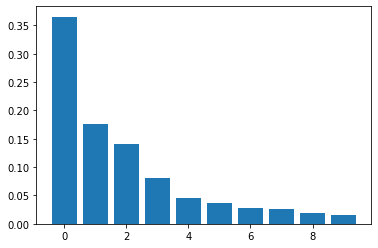

In [123]:
gpol = getg(mpol)
res = sorted([(x, gproj(gpol, mpol, x)) for x in filter(lambda x: x in vocab, vocab)], key=lambda x: x[1])
for i in range(20):
    print(f"{res[i][0].ljust(20)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(20)} {res[-i-1][1]:.2f}")

husband              -0.60 		 defense              0.49
woman                -0.60 		 secondary            0.48
song                 -0.60 		 offense              0.47
girl                 -0.60 		 rush                 0.46
local                -0.59 		 effectively          0.46
mr                   -0.59 		 solid                0.43
police               -0.59 		 threat               0.43
ms                   -0.58 		 performance          0.42
sang                 -0.58 		 collins              0.42
supreme              -0.58 		 crucial              0.41
girls                -0.58 		 passing              0.40
grand                -0.58 		 defenses             0.40
store                -0.57 		 particularly         0.40
magazine             -0.57 		 blocking             0.39
federal              -0.56 		 manning              0.38
county               -0.56 		 throwing             0.38
newspaper            -0.56 		 frequently           0.37
section              -0.56 		 role              

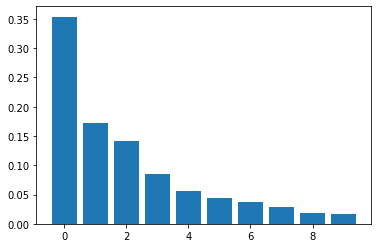

In [124]:
gfball = getg(mfball)
res = sorted([(x, gproj(gfball, mfball, x)) for x in filter(lambda x: x in vocab, vocab)], key=lambda x: x[1])
for i in range(20):
    print(f"{res[i][0].ljust(20)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(20)} {res[-i-1][1]:.2f}")

without              -0.41 		 chairman             0.92
help                 -0.36 		 democrat             0.91
their                -0.34 		 john                 0.88
these                -0.34 		 representative       0.86
our                  -0.34 		 speaker              0.86
pay                  -0.33 		 tom                  0.83
or                   -0.31 		 leader               0.83
greater              -0.29 		 massachusetts        0.82
raise                -0.29 		 jr                   0.82
nuclear              -0.29 		 michael              0.82
provide              -0.28 		 senator              0.81
companies            -0.28 		 texas                0.81
oil                  -0.28 		 james                0.81
money                -0.27 		 iowa                 0.80
making               -0.27 		 edwards              0.80
large                -0.27 		 joseph               0.80
economic             -0.27 		 richard              0.79
into                 -0.26 		 howard            

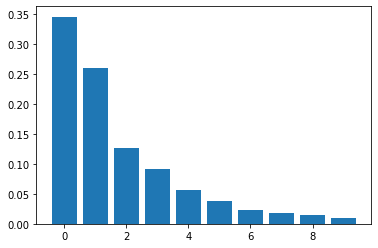

In [126]:
gpol_s = getg(mpol_s)
res = sorted([(x, gproj(gpol_s, mpol_s, x)) for x in filter(lambda x: x in vocab_s, vocab_s)], key=lambda x: x[1])
for i in range(20):
    print(f"{res[i][0].ljust(20)} {res[i][1]:.2f} \t\t {res[-i-1][0].ljust(20)} {res[-i-1][1]:.2f}")

## Regression for bias testing

In [140]:
def regress(g1, m1, g2, m2, wordlist):
    x = np.array([gproj(g1, m1, w) for w in vocab])
    y = np.array([gproj(g2, m2, w) for w in vocab])
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    return slope, p_value

In [141]:
regress(gpol, mpol, gpols, mpols, proflist)

(0.533629121432331, 1.5349588515623742e-57)

In [142]:
regress(gcomp, mcomp, gcomps, mcomps, proflist)

(-0.47288942755651714, 6.5938456670774195e-21)

In [143]:
regress(gtrav, mtrav, gtravs, mtravs, proflist)

(0.1988740624251196, 4.7826899611645153e-17)